<a href="https://colab.research.google.com/github/kaelasyadira/DIF62130_A_25_2311531001_Kaela-Assyura-Syadira/blob/main/Pratikum2/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#load dataset
dataset_url = 'https://raw.githubusercontent.com/kaelasyadira/DIF62130_A_25_2311531001_Kaela-Assyura-Syadira/refs/heads/main/dataset/diabetes.csv'
df = pd.read_csv(dataset_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#membagi data menjadi features dan target variabel
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_cols] #feature
Y = df.Outcome #target variable

In [3]:
print(X.shape)
print(Y.shape)
#menunjukkan baris dan kolom serta target(y)

(768, 7)
(768,)


# Membagi data menjadi data training 70% dan data testing 30%

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=16)

# membuat model development dan prediksi

In [5]:
#import the class
from sklearn.linear_model import LogisticRegression

#instantiate the model (using default parameters)
logreg = LogisticRegression(random_state=16)

#fit the model with data
logreg.fit(X_train, Y_train)

#x=fitur y=label
y_pred = logreg.predict(X_test)

# membuat model evaluasi menggunakan metrix confusion

terdapat 4 komponen utama pada confusion metrix dimana ada:
1. true positive yang memprediksi hasil positif dan prediksi model dengan nilai yang sebenarnya dari data uji
2. false positive yang memprediksi positif tapi sebenarnya hasilnya adalah negatif
3. false negative yang memprediksi negatif tapi sebenanrnya adalah positif
4. true negatif yang memprediksi negatif dan hasilnya emang negatif

pada kode ini:
true positif: 134
false positif: 13
false negatif: 35
true negatif: 49

dan jika ditampilkan pada heatmap akan seperti dibawah ini

In [6]:
#import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[134,  13],
       [ 35,  49]])

Text(0.5, 427.9555555555555, 'Predicted Label')

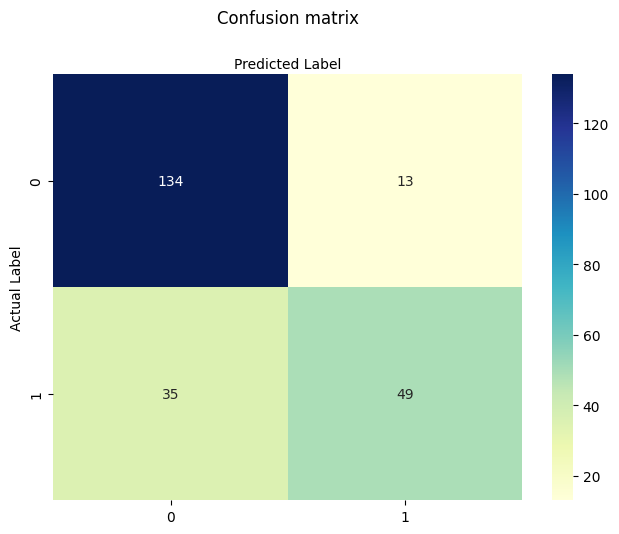

In [7]:
#import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# metrix evaluasi

terdapat akurasi yang memprediksi model tersebut dengan benar, presisi yang memprediksi seberapa banyak prediksi positif yang benar, recall yang memprediksi seberapa baik model tersebut menangkap semua kasus positif, F-1 Score yang memprediksi rata-rata antara presisi dan recall, dan terakhir ada specificity yang memprediksi seberapa baik model tersebut mengenali kelas negatif

In [8]:
#confusion

from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(Y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.91      0.85       147
   with diabetes       0.79      0.58      0.67        84

        accuracy                           0.79       231
       macro avg       0.79      0.75      0.76       231
    weighted avg       0.79      0.79      0.78       231



# ROC CURVE

merupakan grafik yang digunakan untuk mengevaluasi kinerja suatu model yang mana bisa kita gunakan untuk membedakan kelas positif dan kelas negatif, semakin mendekati pojok kiri atas suatu grafik maka semakin sedikit False Positif nya.

kemudian juga menggunakan auc yang mempermudah kita untuk menginterpretasikan roc ini curve

<function matplotlib.pyplot.show(close=None, block=None)>

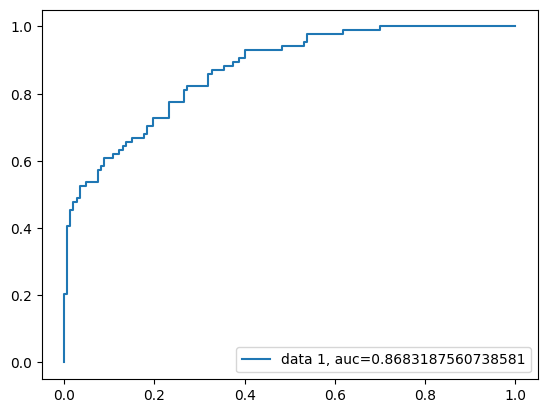

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show